In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report 

E:\anaconda\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
reviews = pd.read_csv('balanced.csv')

In [4]:
reviews

,title,rating,body,y,cleaned_reviews,classes,cleaned_reviews_1,polarity,polarity_class
0,Unstable for large books,1,this calls for less than 20 lbs and a max dept...,0,call less lb max depth book book lb less see s...,bad,"['max', 'depth', 'book', 'book', 'signific', '...",-0.055556,negative
1,Get the large set,3,go ahead and buy the large set the small set o...,1,go ahead buy larg set small set paperback imoi...,moderate,"['ahead', 'buy', 'larg', 'set', 'small', 'set'...",-0.300000,negative
2,Measure your books before buying this,1,the bookholder platform on the large size book...,0,bookhold platform larg size bookshelf big stan...,bad,"['bookhold', 'platform', 'larg', 'size', 'book...",0.225000,positive
3,WILL NOT FIT NORMAL HARDCOVER BOOKS!!,2,be forewarned these shelves do not fit a stand...,0,forewarn shelv fit standard hardcov book even ...,bad,"['forewarn', 'shelv', 'fit', 'standard', 'hard...",0.165152,positive
4,Disappointed,2,i was so excited when buying this but after ha...,0,excit buy hang place son book disappoint suppo...,bad,"['excit', 'buy', 'hang', 'place', 'son', 'book...",0.200000,positive
...,...,...,...,...,...,...,...,...,...
200,Five Stars,5,easy to install looks great,2,easi instal look great,good,"['easi', 'instal', 'look', 'great']",0.800000,positive
201,Four Stars,4,unusual and a great accent prop,2,unusu great accent prop,good,"['unusu', 'great', 'accent', 'prop']",0.800000,positive
202,Were very easy to install even though instruct...,5,exactly as described and shown in the photos w...,2,exactli describ shown photo easi instal even t...,good,"['exactli', 'describ', 'show', 'photo', 'easi'...",0.800000,positive
203,great decorative addition,5,these look great,2,look great,good,"['look', 'great']",0.800000,positive


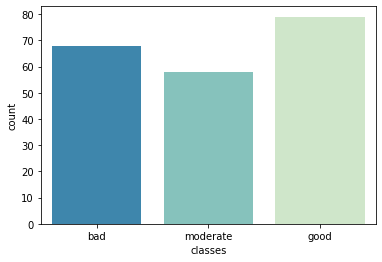

In [5]:
sns.countplot(x=reviews['classes'], palette='GnBu_r')

In [6]:
reviews['classes'].value_counts()

good        79
bad         68
moderate    58
Name: classes, dtype: int64

In [7]:
# performance mesurement

def model_performane(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [9]:
corpus = reviews['cleaned_reviews']

In [13]:
# convert text into vectors
cv = CountVectorizer(max_features = 2000)

x = cv.fit_transform(corpus).toarray()
y = reviews.loc[:, 'classes'].values
y

array(['bad', 'moderate', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'moderate', 'bad', 'bad', 'bad', 'bad', 'moderate', 'moderate',
       'moderate', 'moderate', 'bad', 'bad', 'moderate', 'moderate',
       'moderate', 'bad', 'bad', 'moderate', 'bad', 'moderate',
       'moderate', 'moderate', 'moderate', 'bad', 'moderate', 'bad',
       'moderate', 'bad', 'moderate', 'bad', 'bad', 'bad', 'bad',
       'moderate', 'moderate', 'bad', 'bad', 'bad', 'moderate',
       'moderate', 'bad', 'moderate', 'bad', 'moderate', 'bad', 'bad',
       'moderate', 'moderate', 'bad', 'bad', 'moderate', 'moderate',
       'moderate', 'moderate', 'moderate', 'moderate', 'bad', 'bad',
       'moderate', 'moderate', 'bad', 'moderate', 'bad', 'bad', 'bad',
       'moderate', 'bad', 'bad', 'bad', 'bad', 'moderate', 'moderate',
       'bad', 'bad', 'bad', 'moderate', 'bad', 'moderate', 'moderate',
       'moderate', 'bad', 'bad', 'moderate', 'moderate', 'bad', 'bad',
       'bad', 'bad', 'bad', '

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [ ]:
x_train.shape

(143, 909)

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

gaussNB_classifier = GaussianNB()
gaussNB_classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = gaussNB_classifier.predict(x_test)

In [ ]:
model_performane(y_test,y_pred)

[[12  3  8]
 [ 3 21  4]
 [ 1  1  9]]
              precision    recall  f1-score   support

         bad       0.75      0.52      0.62        23
        good       0.84      0.75      0.79        28
    moderate       0.43      0.82      0.56        11

    accuracy                           0.68        62
   macro avg       0.67      0.70      0.66        62
weighted avg       0.73      0.68      0.69        62



<AxesSubplot:ylabel='count'>

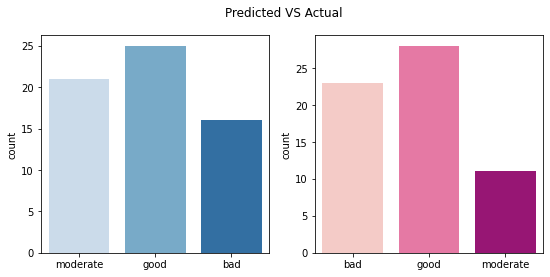

In [ ]:
f, axs = plt.subplots(1,2, figsize=(9,4))
f.suptitle("Predicted VS Actual")

sns.countplot(x=y_pred, ax=axs[0], palette='Blues') #countplot for predicted values
sns.countplot(x=y_test, ax=axs[1], palette='RdPu') # countplot for actual values

#### Model 2

In [ ]:
multiNB_classifier = MultinomialNB()
multiNB_classifier.fit(x_train, y_train)

y_predNB = multiNB_classifier.predict(x_test)
model_performane(y_test,y_predNB)

[[11  1 11]
 [ 1 27  0]
 [ 0  2  9]]
              precision    recall  f1-score   support

         bad       0.92      0.48      0.63        23
        good       0.90      0.96      0.93        28
    moderate       0.45      0.82      0.58        11

    accuracy                           0.76        62
   macro avg       0.76      0.75      0.71        62
weighted avg       0.83      0.76      0.76        62



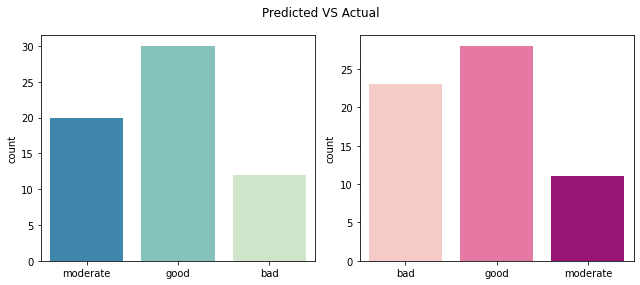

In [ ]:
f, axs = plt.subplots(1,2, figsize=(9,4))
f.suptitle("Predicted VS Actual")

sns.countplot(x=y_predNB, ax=axs[0], palette='GnBu_r') #countplot for predicted values
sns.countplot(x=y_test, ax=axs[1], palette='RdPu') # countplot for actual values
f.tight_layout()

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFclassifier = RandomForestClassifier(n_estimators=10, criterion='gini', random_state=0)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [ ]:
RFy_pred = RFclassifier.predict(x_test)

In [ ]:
model_performane(y_test,RFy_pred)

[[13  5  5]
 [ 1 27  0]
 [ 8  1  2]]
              precision    recall  f1-score   support

         bad       0.59      0.57      0.58        23
        good       0.82      0.96      0.89        28
    moderate       0.29      0.18      0.22        11

    accuracy                           0.68        62
   macro avg       0.56      0.57      0.56        62
weighted avg       0.64      0.68      0.65        62



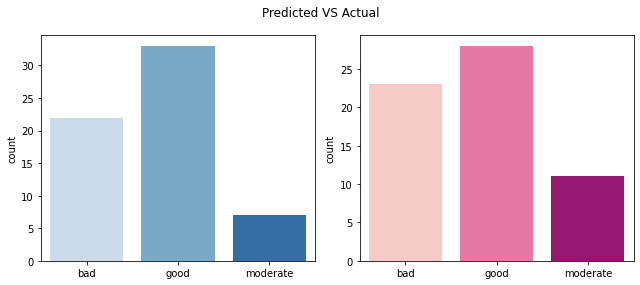

In [ ]:
f, axs = plt.subplots(1,2, figsize=(9,4))
f.suptitle("Predicted VS Actual")

sns.countplot(x=RFy_pred, ax=axs[0], palette='Blues') #countplot for predicted values
sns.countplot(x=y_test, ax=axs[1], palette='RdPu') # countplot for actual values
f.tight_layout()

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticreg = LogisticRegression()
logisticreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
logisticreg_pred = logisticreg.predict(x_test)

In [ ]:
model_performane(y_test,logisticreg_pred)

[[15  1  7]
 [ 2 26  0]
 [ 3  0  8]]
              precision    recall  f1-score   support

         bad       0.75      0.65      0.70        23
        good       0.96      0.93      0.95        28
    moderate       0.53      0.73      0.62        11

    accuracy                           0.79        62
   macro avg       0.75      0.77      0.75        62
weighted avg       0.81      0.79      0.79        62



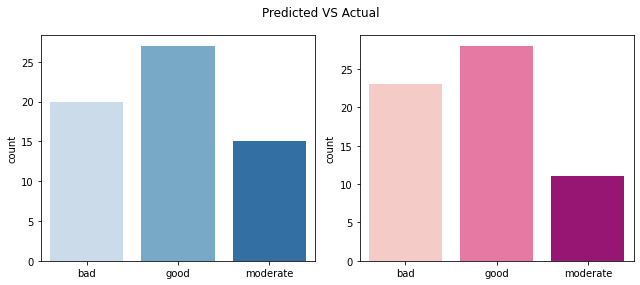

In [ ]:
f, axs = plt.subplots(1,2, figsize=(9,4))
f.suptitle("Predicted VS Actual")

sns.countplot(x=logisticreg_pred, ax=axs[0], palette='Blues') #countplot for predicted values
sns.countplot(x=y_test, ax=axs[1], palette='RdPu') # countplot for actual values
f.tight_layout()

### LGBM

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgb = LGBMClassifier()
lgb.fit(x_train, y_train)

LGBMClassifier()

In [ ]:
lgb_pred = lgb.predict(x_test)

In [ ]:
model_performane(y_test,lgb_pred)

[[12  1 10]
 [ 7 17  4]
 [ 5  0  6]]
              precision    recall  f1-score   support

         bad       0.50      0.52      0.51        23
        good       0.94      0.61      0.74        28
    moderate       0.30      0.55      0.39        11

    accuracy                           0.56        62
   macro avg       0.58      0.56      0.55        62
weighted avg       0.67      0.56      0.59        62



In [ ]:
from xgboost import XGBRFClassifier

In [ ]:
xgb = XGBRFClassifier()
xgb.fit(x_train, y_train)

C:\Users\shiva\anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:31:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False, gamma=0,
                gpu_id=-1, importance_type=None, interaction_constraints='',
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=4,
                num_parallel_tree=100, objective='multi:softprob',
                predictor='auto', random_state=0, reg_alpha=0,
                scale_pos_weight=None, tree_method='exact',
                validate_parameters=1, verbosity=None)

In [ ]:
xgb_pred = xgb.predict(x_test)

In [ ]:
model_performane(y_test,xgb_pred)

[[12  2  9]
 [ 2 26  0]
 [ 9  0  2]]
              precision    recall  f1-score   support

         bad       0.52      0.52      0.52        23
        good       0.93      0.93      0.93        28
    moderate       0.18      0.18      0.18        11

    accuracy                           0.65        62
   macro avg       0.54      0.54      0.54        62
weighted avg       0.65      0.65      0.65        62



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adaboost = XGBRFClassifier()
adaboost.fit(x_train, y_train)

[23:34:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False, gamma=0,
                gpu_id=-1, importance_type=None, interaction_constraints='',
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=4,
                num_parallel_tree=100, objective='multi:softprob',
                predictor='auto', random_state=0, reg_alpha=0,
                scale_pos_weight=None, tree_method='exact',
                validate_parameters=1, verbosity=None)

In [ ]:
adaboost_pred = adaboost.predict(x_test)

In [ ]:
model_performane(y_test,adaboost_pred)

[[12  2  9]
 [ 2 26  0]
 [ 9  0  2]]
              precision    recall  f1-score   support

         bad       0.52      0.52      0.52        23
        good       0.93      0.93      0.93        28
    moderate       0.18      0.18      0.18        11

    accuracy                           0.65        62
   macro avg       0.54      0.54      0.54        62
weighted avg       0.65      0.65      0.65        62



### SVM

In [ ]:
from sklearn.svm import SVC

svc = SVC(C=100, kernel='rbf', gamma=0.001)
svc.fit(x_train, y_train)

svc_pred = svc.predict(x_test)

model_performane(y_test, svc_pred)

[[15  1  7]
 [ 2 26  0]
 [ 7  0  4]]
              precision    recall  f1-score   support

         bad       0.62      0.65      0.64        23
        good       0.96      0.93      0.95        28
    moderate       0.36      0.36      0.36        11

    accuracy                           0.73        62
   macro avg       0.65      0.65      0.65        62
weighted avg       0.73      0.73      0.73        62



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000], 'gamma': [1,0.1,0.01,0.001,0.0001,0.00001], 'kernel': ['rbf']} 

In [ ]:
grid  = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

In [ ]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.345 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.345 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.379 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.357 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.357 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.379 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.345 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.448 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.357 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.357 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.345 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 5/5] END ....C=100, gamma=1e-05, kernel=rbf;, score=0.357 total time=   0.0s
[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.414 total time=   0.0s
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.414 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.517 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.321 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.536 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.621 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.621 total time=   0.0s
[CV 2/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
grid_predictions = grid.predict(x_test)

In [ ]:
model_performane(y_pred, grid_predictions)

[[ 9  3  4]
 [ 6 19  0]
 [ 9  5  7]]
              precision    recall  f1-score   support

         bad       0.38      0.56      0.45        16
        good       0.70      0.76      0.73        25
    moderate       0.64      0.33      0.44        21

    accuracy                           0.56        62
   macro avg       0.57      0.55      0.54        62
weighted avg       0.60      0.56      0.56        62

